

## Get the data


In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-01-01 12:47:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.18.207, 142.250.153.207, 142.250.145.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.18.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  29.2MB/s    in 3.6s    

2024-01-01 12:47:04 (29.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## inspect the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train


pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

there are 2 directories and 0 images in pizza_steak
there are 2 directories and 0 images in pizza_steak/train
there are 0 directories and 750 images in pizza_steak/train/steak
there are 0 directories and 750 images in pizza_steak/train/pizza
there are 2 directories and 0 images in pizza_steak/test
there are 0 directories and 250 images in pizza_steak/test/steak
there are 0 directories and 250 images in pizza_steak/test/pizza


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [7]:
# Get the classnames programmatically

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [8]:
# visualise our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f'image shape:{img.shape}')
  return img

image shape:(512, 512, 3)


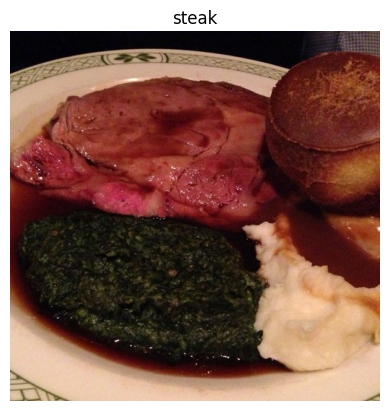

In [9]:
img = view_random_image("pizza_steak/train/", "steak")

In [10]:
# normalize images
img/255.

array([[[0.01176471, 0.00784314, 0.03921569],
        [0.01568627, 0.01176471, 0.04313725],
        [0.02352941, 0.01960784, 0.05098039],
        ...,
        [0.41568627, 0.34509804, 0.29803922],
        [0.35294118, 0.28235294, 0.22745098],
        [0.33333333, 0.26666667, 0.20392157]],

       [[0.01568627, 0.01176471, 0.04313725],
        [0.01960784, 0.01568627, 0.04705882],
        [0.02352941, 0.01960784, 0.05098039],
        ...,
        [0.44705882, 0.37647059, 0.32941176],
        [0.39215686, 0.32156863, 0.26666667],
        [0.33333333, 0.26666667, 0.20392157]],

       [[0.01960784, 0.01568627, 0.04705882],
        [0.01960784, 0.01568627, 0.04705882],
        [0.02352941, 0.01960784, 0.05098039],
        ...,
        [0.40784314, 0.3372549 , 0.29019608],
        [0.38039216, 0.31372549, 0.25098039],
        [0.3254902 , 0.25882353, 0.18823529]],

       ...,

       [[0.78039216, 0.67843137, 0.57254902],
        [0.81176471, 0.71372549, 0.59607843],
        [0.83137255, 0

## An end-to-end example

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* fit the CNN to our training data

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = 'pizza_steak/test'

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = validation_datagen.flow_from_directory(directory=test_dir,
                                                    batch_size=32,
                                                    target_size=(224, 224),
                                                    class_mode="binary",
                                                    seed=42)

# Build a CNN model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),

    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 16s 150ms/step - loss: 0.6417 - accuracy: 0.6100 - val_loss: 0.5279 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 7s 140ms/step - loss: 0.4434 - accuracy: 0.8000 - val_loss: 0.3629 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 6s 129ms/step - loss: 0.4043 - accuracy: 0.8160 - val_loss: 0.3142 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3672 - accuracy: 0.8387 - val_loss: 0.3238 - val_accuracy: 0.8920
Epoch 5/5
47/47 [==============================] - 7s 141ms/step - loss: 0.3238 - accuracy: 0.8727 - val_loss: 0.2642 - val_accuracy: 0.8900


In [12]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 124ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 134ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 127ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 131ms/step - loss: 0.6932 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6932 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.5000


In [13]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 130ms/step - loss: 2.1161 - accuracy: 0.6573 - val_loss: 0.8241 - val_accuracy: 0.6260
Epoch 2/5
47/47 [==============================] - 7s 141ms/step - loss: 1.0544 - accuracy: 0.6833 - val_loss: 0.6104 - val_accuracy: 0.7220
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.5808 - accuracy: 0.7473 - val_loss: 0.4852 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 6s 137ms/step - loss: 0.4792 - accuracy: 0.7860 - val_loss: 0.4292 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 5s 107ms/step - loss: 0.4588 - accuracy: 0.7947 - val_loss: 0.5985 - val_accuracy: 0.7120


In [15]:
# get a summary of model_3 and model_1
model_3.summary(), model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequ

(None, None)

### 1. become one with the data

image shape:(512, 512, 3)
image shape:(512, 512, 3)


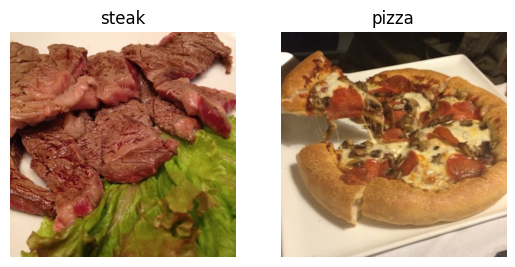

In [16]:
import os
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# turn our data into batchs
# create train and test data generators and rescale the data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [18]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [19]:
# How many batches are there!
len(train_data)

47

In [20]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [21]:
# View the first batch of labels
labels


array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3.Create a cnn model


In [23]:
# make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Baseline model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

model_4.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 146ms/step - loss: 0.0145 - accuracy: 0.9987 - val_loss: 0.8322 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 1.2617 - val_accuracy: 0.7360
Epoch 3/5
47/47 [==============================] - 6s 119ms/step - loss: 0.0418 - accuracy: 0.9893 - val_loss: 0.8943 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 6s 133ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.8951 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 7s 145ms/step - loss: 2.9648e-04 - accuracy: 1.0000 - val_loss: 0.9235 - val_accuracy: 0.7960


### 5.Evaluating our model

<Axes: >

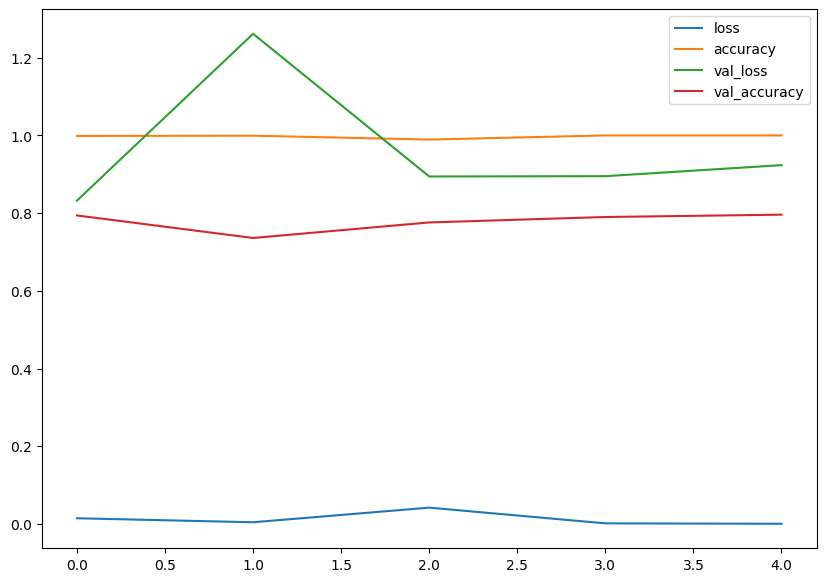

In [26]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [38]:
# Plot the validation and training
def plot_loss_curves(history):
  """
  Returns separate loss curve for training and validation metrics.
  """

  loss = history.history["loss"]
  val_loss = history.history['val_loss']

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title("loss")
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

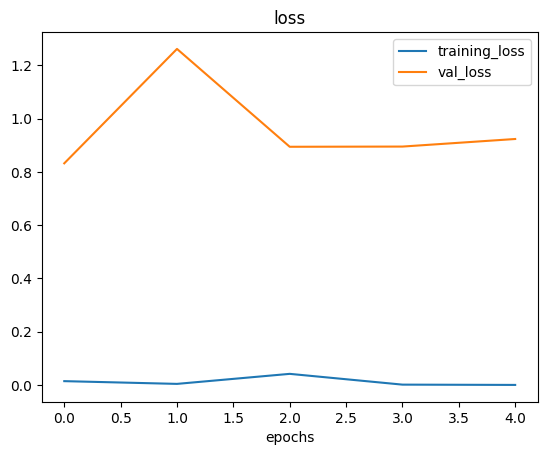

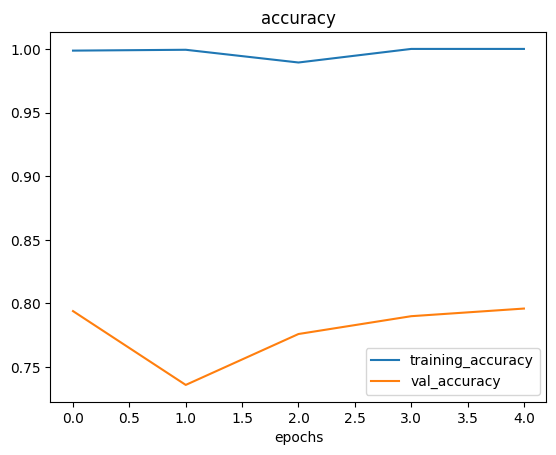

In [39]:
plot_loss_curves(history_4)

### 6. Adjust the model parameters


In [44]:
tf.random.set_seed(42)

model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 130ms/step - loss: 0.6031 - accuracy: 0.6720 - val_loss: 0.5431 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4692 - accuracy: 0.7860 - val_loss: 0.3697 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4154 - accuracy: 0.8240 - val_loss: 0.3436 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3808 - accuracy: 0.8367 - val_loss: 0.3247 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 7s 142ms/step - loss: 0.3687 - accuracy: 0.8420 - val_loss: 0.3099 - val_accuracy: 0.8700


In [46]:
model_5.summary(), model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 26, 26, 10)       

(None, None)

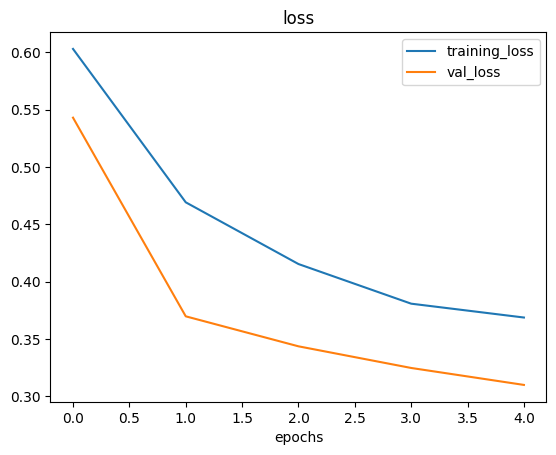

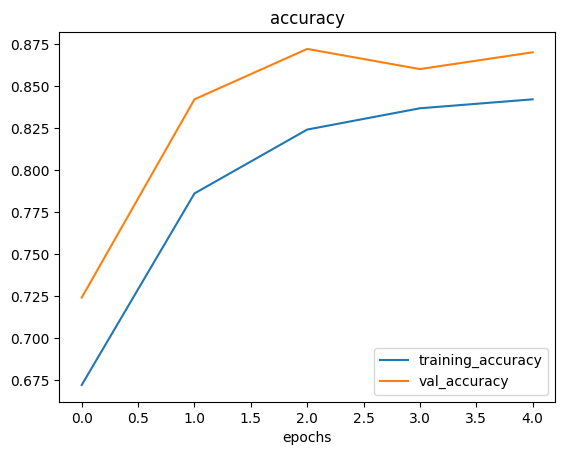

In [47]:
plot_loss_curves(history_5)